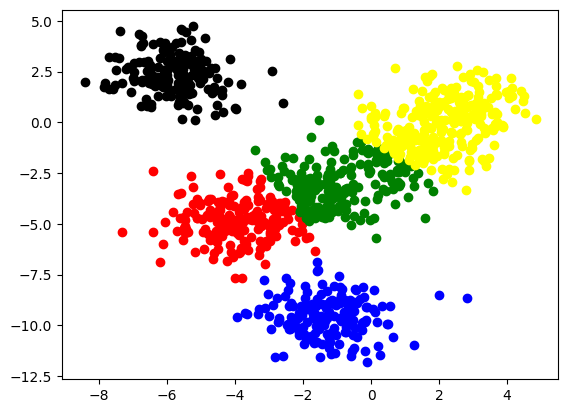

In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from Kmeans import KMeans


X,y=make_blobs(n_samples=1000,centers=6,random_state=2)
km=KMeans(n_cluster=5,max_iter=10)
y_means=km.fit_predict(X)

plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='green')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='blue')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='black')
plt.scatter(X[y_means==4,0],X[y_means==4,1],color='yellow')


plt.show()

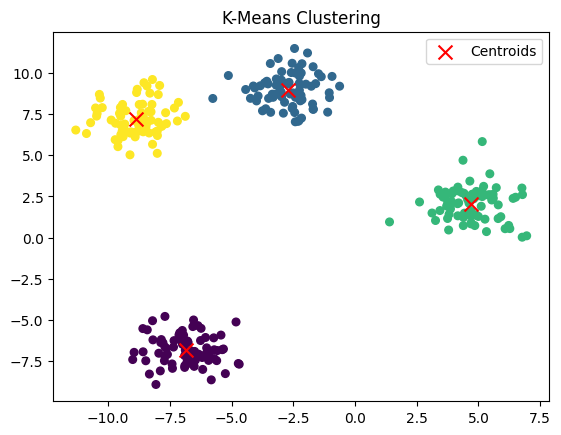

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data (for demonstration)
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# K-Means Implementation
class KMeans:
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None
    
    def initialize_centroids(self, data):
        """Randomly initialize centroids."""
        random_indices = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        self.centroids = data[random_indices]
    
    def assign_clusters(self, data):
        """Assign each data point to the nearest centroid."""
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, data, labels):
        """Compute new centroids as the mean of all points in each cluster."""
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids
    
    def fit(self, data):
        """Run the K-Means algorithm."""
        self.initialize_centroids(data)
        
        for _ in range(self.max_iters):
            # Assign points to clusters
            labels = self.assign_clusters(data)
            
            # Calculate new centroids
            new_centroids = self.update_centroids(data, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        
        return labels

# Running K-Means
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit(data)

# Visualization
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
